In [21]:
import tkinter as tk
from tkinter import filedialog, Label, ttk, messagebox
from PIL import ImageTk, Image
import numpy as np
import tensorflow as tf
import cv2

# Load the trained model
model = tf.keras.models.load_model('fine_tuned_lung_disease_model.h5')

# Class labels
classes = ['Bacterial Pneumonia', 'Coronavirus', 'Normal', 'TB', 'Viral Pneumonia']

# Preprocess the image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to match the input size of the model
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to make a prediction
def predict_disease(img_path):
    try:
        img = preprocess_image(img_path)
        prediction = model.predict(img)
        class_index = np.argmax(prediction)
        result = classes[class_index]
        return result
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")
        return None

# Function to open file dialog and handle prediction
def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    if file_path:
        try:
            # Display the selected image
            img = Image.open(file_path)
            img = img.resize((224, 224))
            img = ImageTk.PhotoImage(img)
            panel.config(image=img)
            panel.image = img  # Keep reference to avoid garbage collection

            # Make a prediction
            result = predict_disease(file_path)
            if result:
                label_result.config(text=f"Predicted Disease: {result}", foreground='green')
        except Exception as e:
            messagebox.showerror("Error", f"Failed to load the image: {e}")

# Tkinter GUI setup
window = tk.Tk()
window.title('Lung Disease Classifier')
window.geometry('500x500')
window.configure(bg='#f4f4f9')

# Styling using ttk for modern look
style = ttk.Style()
style.configure('TButton', font=('Helvetica', 12), padding=10)
style.configure('TLabel', font=('Helvetica', 14))

# Title label
title_label = ttk.Label(window, text="Lung Disease Classifier", font=("Helvetica", 18, "bold"))
title_label.pack(pady=20)

# Button to open and upload the image
btn_upload = ttk.Button(window, text='Upload Chest X-ray', command=open_file)
btn_upload.pack(pady=20)

# Panel to display the image
panel = Label(window, bg='#f4f4f9')
panel.pack(pady=10)

# Label to display prediction result
label_result = ttk.Label(window, text="Prediction will appear here", font=("Helvetica", 14))
label_result.pack(pady=20)

# Run the Tkinter main loop
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%cd C:\Users\Mohd Azhar\OneDrive\Desktop\Mini project-2\archive\data

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory('test', target_size=(224, 224), batch_size=32, class_mode='categorical')


C:\Users\Mohd Azhar\OneDrive\Desktop\Mini project-2\archive\data
Found 2025 images belonging to 5 classes.


C:\Users\Mohd Azhar\OneDrive\Desktop\Mini project-2\archive\data


C:\Users\Mohd Azhar\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step


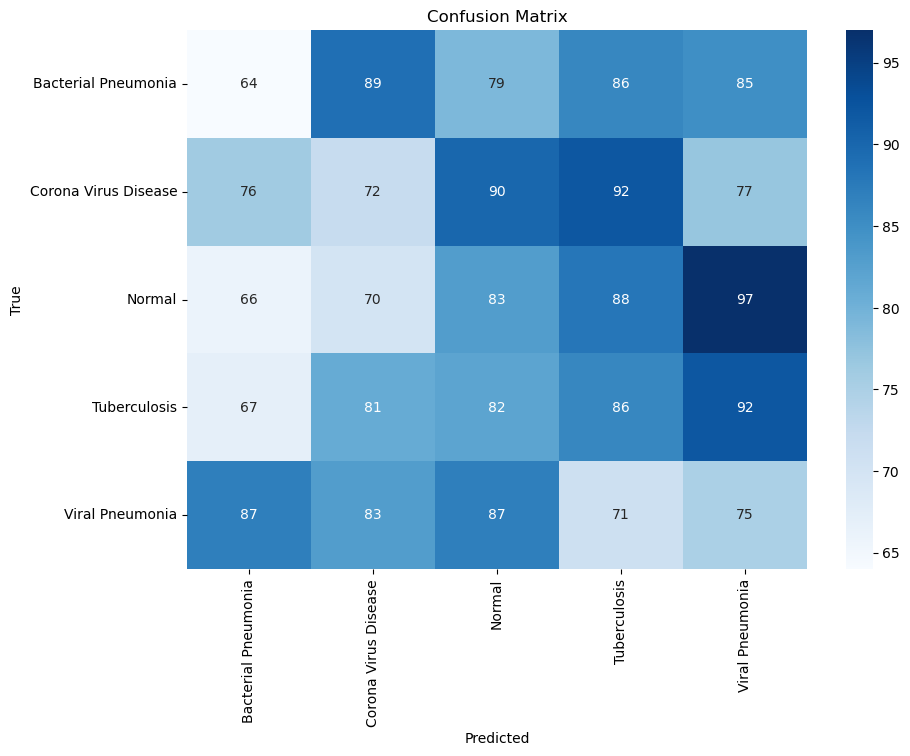

Classification Report
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.18      0.16      0.17       403
Corona Virus Disease       0.18      0.18      0.18       407
              Normal       0.20      0.21      0.20       404
        Tuberculosis       0.20      0.21      0.21       408
     Viral Pneumonia       0.18      0.19      0.18       403

            accuracy                           0.19      2025
           macro avg       0.19      0.19      0.19      2025
        weighted avg       0.19      0.19      0.19      2025

Accuracy: 18.77%


64/64 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.8614 - loss: 0.3215
Test Accuracy: 86.86%
Test Loss: 0.3108
64/64 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step
Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.25      0.22      0.23       403
Corona Virus Disease       0.20      0.20      0.20       407
              Normal       0.22      0.23      0.22       404
        Tuberculosis       0.20      0.21      0.20       408
     Viral Pneumonia       0.19      0.20      0.19       403

            accuracy                           0.21      2025
           macro avg       0.21      0.21      0.21      2025
        weighted avg       0.21      0.21      0.21      2025



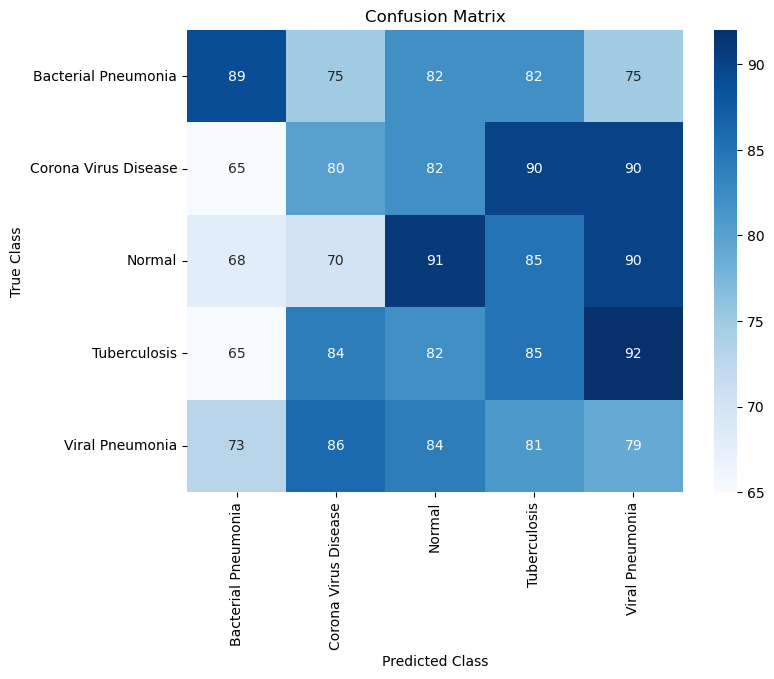

In [16]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('fine_tuned_lung_disease_model.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions on the test data
test_data.reset()  # Reset the test generator before making predictions
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the test data
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())  # Get the class labels

# Generate the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


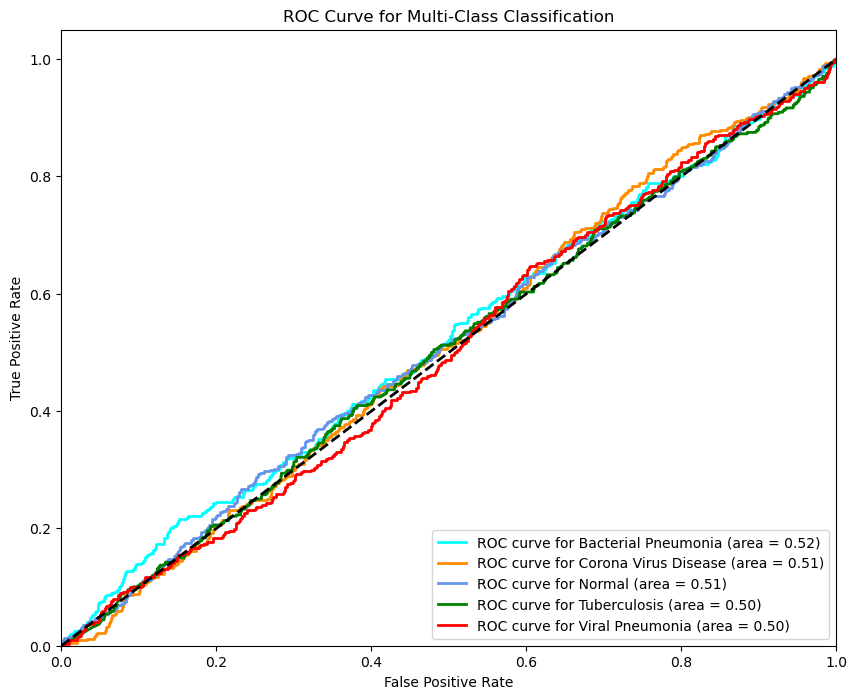

In [17]:
# Plot Accuracy and Loss curves
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Assume 'history' is available from model training
# plot_training_history(history)

# ROC Curve for multi-class classification
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

n_classes = len(class_labels)
y_true_bin = label_binarize(true_classes, classes=[*range(n_classes)])  # True labels as binary
y_score = predictions  # Probabilities for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for {class_labels[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()
 